In [161]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import re
stopword=set(stopwords.words('english'))
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
import textblob 
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kritisaxena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
data = pd.read_csv("tweets_v8.csv")

In [94]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


In [96]:
data.describe()

,user_followers,user_friends,user_favourites
count,8.001900e+04,8.001900e+04,8.001900e+04
mean,1.794587e+04,1.071020e+03,1.796449e+04
std,2.451159e+05,6.751348e+03,4.850358e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.180000e+02,4.420000e+02
50%,2.910000e+02,3.930000e+02,3.028000e+03
75%,1.183000e+03,9.860000e+02,1.494000e+04
max,1.684642e+07,1.211576e+06,1.144792e+06


In [97]:
data.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

In [98]:
data['user_location'].value_counts()

Los Angeles, CA    902
London, England    718
United States      698
India              675
USA                632
                  ... 
Tal'Dorei            1
your dreams.         1
Right Here           1
Raftel               1
Murcia Spain         1
Name: user_location, Length: 18235, dtype: int64

In [99]:
print("Start Date:\t",data.date.sort_values().iloc[0])
print("End Date:\t",data.date.sort_values().iloc[-1])
def date_new(date):
    dt_format = '%Y-%m-%d %H:%M:%S%z'
    return datetime.strptime(date, dt_format).strftime('%b %d')

data['date_new'] = data['date'].apply(lambda x: parse_date(x))

Start Date:	 2021-10-05 11:05:24+00:00
End Date:	 2021-11-01 05:18:13+00:00


In [132]:
#droping date column, we will be using the new date column further 
data.drop(['date'], axis=1, inplace = True)

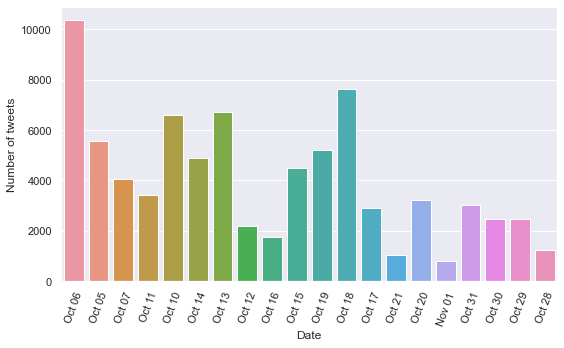

In [120]:
sns.countplot(x='date_new', data=data)
plt.xticks(rotation=70)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Number of tweets")
sns.set(rc={"figure.figsize":(8, 5)})

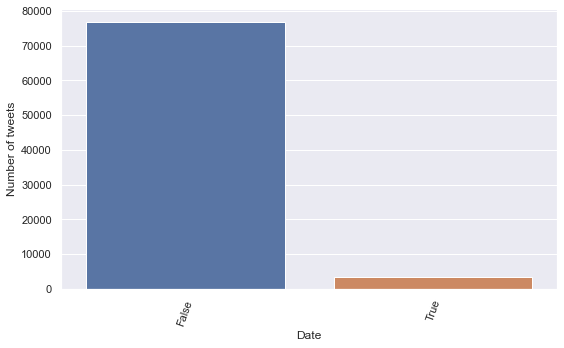

In [121]:
sns.countplot(x='user_verified', data=data)
plt.xticks(rotation=70)
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Number of tweets")
sns.set(rc={"figure.figsize":(8, 5)})

In [110]:
# removing some emoji's and other special characters from the dataset
data = data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,date_new
0,the _ndr-ratd niggh,nan,@ManUtd die hard\n\n\nYOLO\n\n\nJ'ai besoin de...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False,Oct 06
1,Best uncle on planet earth,nan,nan,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me.,Twitter for Android,False,Oct 06
2,marcie,nan,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False,Oct 06
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False,Oct 06
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False,Oct 06


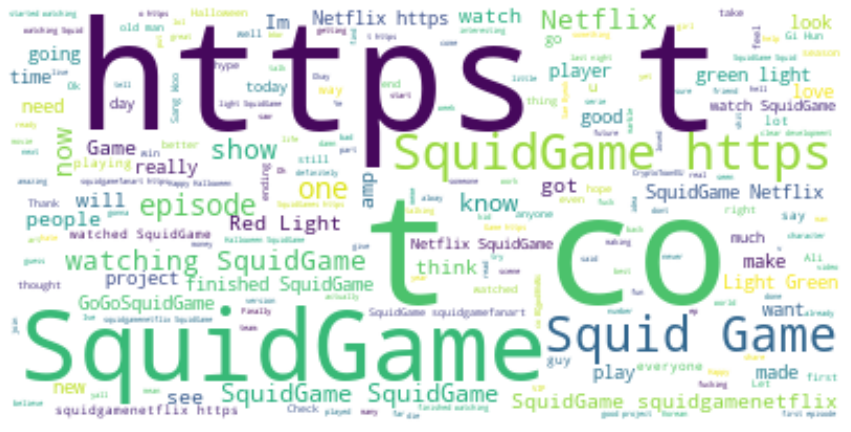

In [122]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

since it is considering https as one the most common word, we will clean the text column for a clear further analysis 

In [66]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

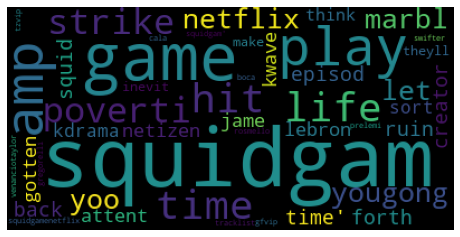

<Figure size 1080x720 with 0 Axes>

In [79]:
text = data['text'].values 

wordcloud2 = WordCloud().generate(str(text))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.figure( figsize=(15,10))
plt.show()

In [133]:
# Establishing polarity and subjectivity for the dataset 
data[['polarity', 'subjectivity']] = data['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,source,is_retweet,date_new,polarity,subjectivity
0,the _ndr-ratd niggh,nan,@ManUtd die hard\n\n\nYOLO\n\n\nJ'ai besoin de...,2019-09-06 19:24:57+00:00,581,1035,8922,False,When life hits and the same time poverty strik...,Twitter for Android,False,Oct 06,-0.200,0.262500
1,Best uncle on planet earth,nan,nan,2013-05-08 19:35:26+00:00,741,730,8432,False,That marble episode of #SquidGame ruined me.,Twitter for Android,False,Oct 06,0.000,0.000000
2,marcie,nan,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,#Squidgame time,Twitter Web App,False,Oct 06,0.000,0.000000
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False,Oct 06,-0.200,0.400000
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,"The two first games, players were killed by th...",Twitter Web App,False,Oct 06,-0.225,0.272222


In [147]:
def sentiment_scores(text):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(clean(text))
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= -0.05 :
        return "Negative"
    else :
        return "Neutral"

In [152]:
data['vader_Sentiment']=data['text'].apply(lambda x: sentiment_scores(clean(x)))

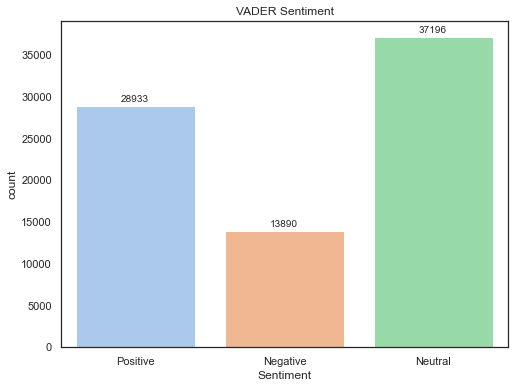

In [159]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x=data['vader_Sentiment'])
total = len(data['vader_Sentiment'])
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 500
    ax.annotate(p.get_height(), (x, y), size = 10)
sns.set_palette("pastel")
plt.xlabel('Sentiment')
plt.title('VADER Sentiment')
plt.show()